In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/content/heart.csv")

print(data.info())
print(data.describe())
data.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0


In [23]:
x=data.iloc[:,:-1]
y=data['target']

In [24]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred1=dt.predict([[53,1,0,140,203,1,0,155,1,3.1,0,0,3]])
y_pred=dt.predict(x_test)
print(y_pred1)
print(y_pred)
acc = accuracy_score(y_test,y_pred)*100
print("Decision Tree Accuracy(no depth limit):",acc)

[0]
[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0]
Decision Tree Accuracy(no depth limit): 98.53658536585365


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


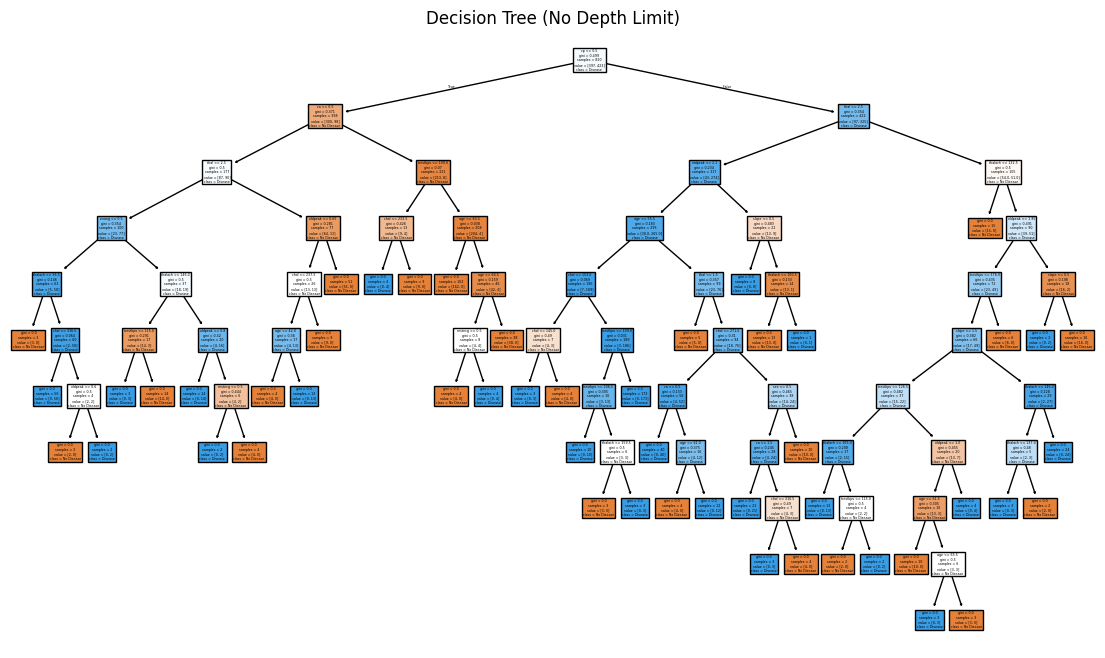

In [27]:
plt.figure(figsize=(14,8))
plot_tree(dt,feature_names=x.columns,class_names=['No Disease','Disease'],filled=True)
plt.title("Decision Tree (No Depth Limit)")
plt.show()

In [28]:
dt_limit=DecisionTreeClassifier(max_depth=4)
dt_limit.fit(x_train,y_train)
y_pred_limit=dt_limit.predict(x_test)
dt_acc_limit=accuracy_score(y_test,y_pred_limit)*100
print("Decision Tree Accuracy(max_depth=4):", dt_acc_limit)

Decision Tree Accuracy(max_depth=4): 80.0


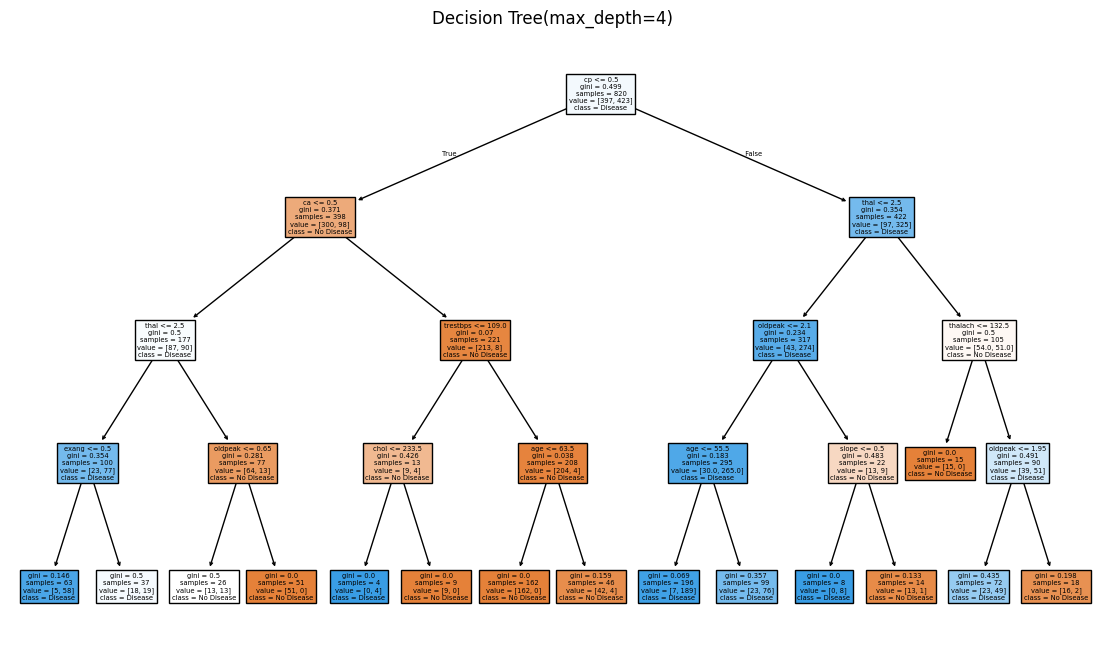

In [30]:
plt.figure(figsize=(14,8))
plot_tree(dt_limit,feature_names=x.columns,class_names=['No Disease','Disease'],filled=True)
plt.title("Decision Tree(max_depth=4)")
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
rf_acc=accuracy_score(y_test,y_pred_rf)*100
print("Random Forest Accuracy:",rf_acc)

Random Forest Accuracy: 98.53658536585365


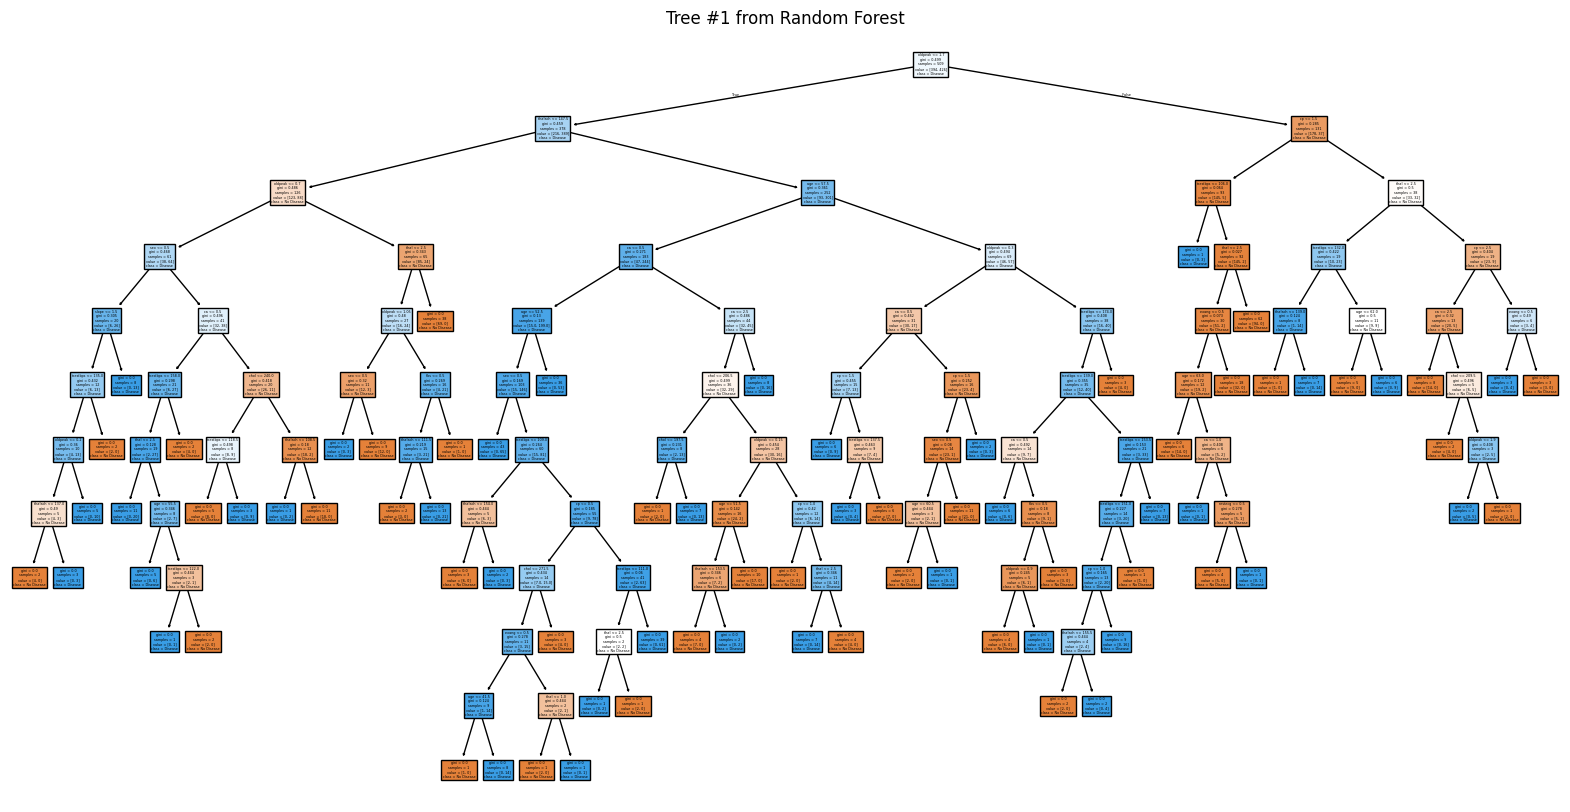

In [40]:
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0],feature_names=x.columns,class_names=['No Disease','Disease'],filled=True)
plt.title("Tree #1 from Random Forest")
plt.show()

In [37]:
feature_importances = pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100
print("\nFeature Importances:\n", feature_importances)


Feature Importances:
 cp          13.783064
thal        12.915982
ca          12.057148
thalach     12.046095
oldpeak     11.595488
chol         8.149202
age          7.894445
trestbps     7.159991
exang        4.651110
slope        4.178076
sex          3.119818
restecg      1.556673
fbs          0.892906
dtype: float64


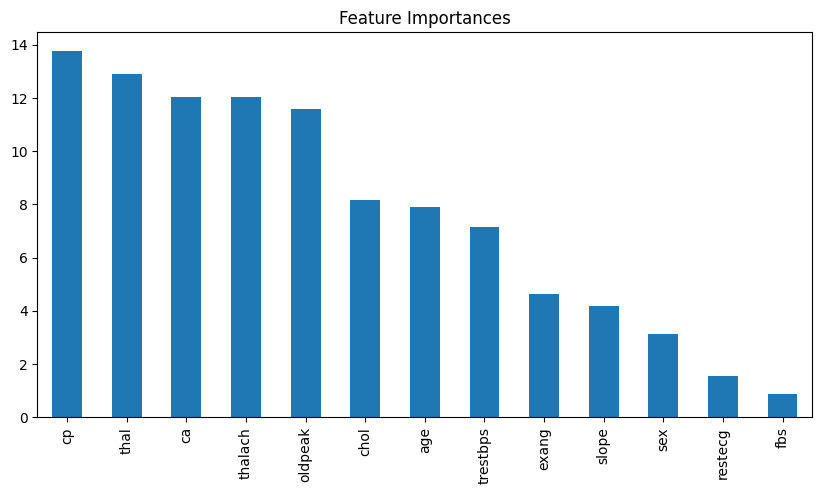

In [38]:
feature_importances.plot(kind='bar',figsize=(10, 5),title="Feature Importances")
plt.show()

In [39]:
cv_scores = cross_val_score(rf,x,y,cv=5)
print("\nCross-Validation Accuracy Scores:",cv_scores)
print("Mean CV Accuracy:",cv_scores.mean())


Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073
